#**1.`Load and visualize MNIST`**



In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import torch
import torch.nn as nn
import torch.optim as optimizer
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_transform=transforms.Compose([
                                    transforms.ToTensor(),
                                     
])

In [4]:
trainset=torchvision.datasets.MNIST('./data',train=True,download=True,transform=train_transform)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [5]:
batch_size=4

In [6]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)

In [7]:
dataiter=iter(trainloader)
images,label=next(dataiter)
print(images.shape)
print(images[0].shape)

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])


In [8]:
def imshow(img,title):
  plt.figure(figsize=(4*batch_size,4))
  plt.axis('off')
  plt.imshow(np.transpose(img,(1,2,0)))
  plt.title(title)
  plt.show()

In [9]:
def show_batch(trainloader):
  dataiter=iter(trainloader)
  images,label=next(dataiter)
  img=torchvision.utils.make_grid(images)
  imshow(img,[str(x.item())+'                                        ' for x in label])
  images,label=next(dataiter)
  img=torchvision.utils.make_grid(images)
  imshow(img,[str(x.item()) +'                                        'for x in label])
  images,label=next(dataiter)
  img=torchvision.utils.make_grid(images)
  imshow(img,[str(x.item())+'                                           ' for x in label])
  images,label=next(dataiter)
  img=torchvision.utils.make_grid(images)
  imshow(img,[str(x.item())+'                                             ' for x in label])
  return images,label

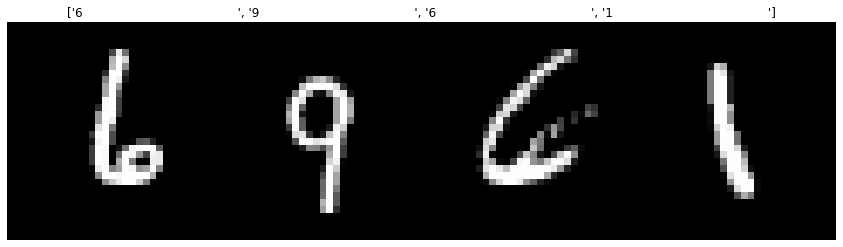

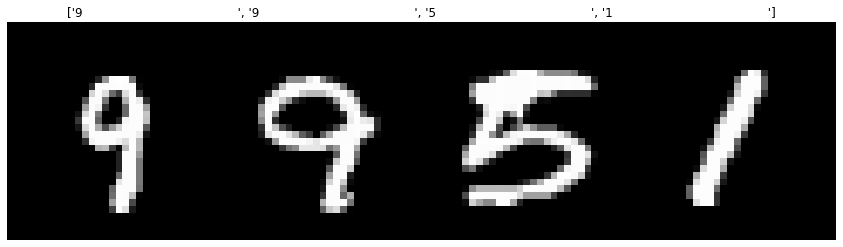

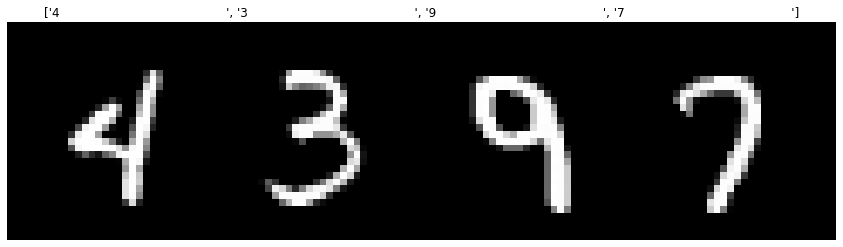

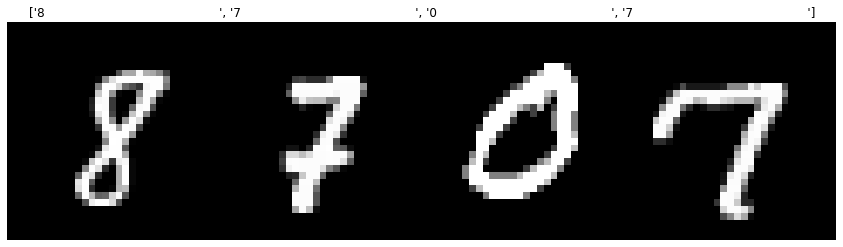

In [10]:
images,label=show_batch(trainloader)

#**2.`Comparison between CNN with\without BatchNorm`**

In [84]:
class MyCNNBn(nn.Module):
  def __init__(self):
    super(MyCNNBn,self).__init__()
    self.features1=nn.Sequential(
            nn.Conv2d(1,3,5), #(N,1,28,28)->(N,3,24,24)
            nn.BatchNorm2d(3),
            nn.ReLU(),
            nn.AvgPool2d(2,2),#(N,3,24,24)->(N,3,12,12)
            nn.Conv2d(3,6,3),#(N,3,12,12)->(N,3,10,10)
            nn.BatchNorm2d(6)
        )
    self.features2=nn.Sequential(
            nn.ReLU(),
            nn.AvgPool2d(2,2)#(N,6,10,10)->(N,6,5,5)
    )
    self.classifier=nn.Sequential(
            nn.Linear(150,64),#(N,150)->(N,64)
            nn.ReLU(),
            nn.Linear(64,32),#(N,64)->(N,32)
            nn.ReLU(),
            nn.Linear(32,10)#(N,32)->(N,10)[0to9]
    )
  def forward(self,x_in):
    x=self.features1(x_in)
    x=self.features2(x)
    x = x.view(x.size(0), -1)
    x=self.classifier(x)
    return x

In [85]:
class MyjustCNN(nn.Module):
  def __init__(self):
    super(MyjustCNN,self).__init__()
    self.features1=nn.Sequential(
            nn.Conv2d(1,3,5),
            nn.ReLU(),
            nn.AvgPool2d(2,2),#(N,3,24,24)->(N,3,12,12)
            nn.Conv2d(3,6,3),#(N,3,12,12)->(N,3,10,10)
        )
    self.features2=nn.Sequential(
            nn.ReLU(),
            nn.AvgPool2d(2,2)#(N,6,10,10)->(N,6,5,5)
    )
    self.classifier=nn.Sequential(
            nn.Linear(150,64),#(N,150)->(N,64)
            nn.ReLU(),
            nn.Linear(64,32),#(N,64)->(N,32)
            nn.ReLU(),
            nn.Linear(32,10)#(N,32)->(N,10)[0to9]
    )
  def forward(self,x_in):
    x=self.features1(x_in)
    x=self.features2(x)
    x = x.view(x.size(0), -1)
    x=self.classifier(x)
    return x

In [86]:
MyCNNModel = MyCNNBn()
print(MyCNNModel)

MyCNNBn(
  (features1): Sequential(
    (0): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (4): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (5): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (features2): Sequential(
    (0): ReLU()
    (1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (classifier): Sequential(
    (0): Linear(in_features=150, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=10, bias=True)
  )
)


In [87]:
justCNN=MyjustCNN()
print(justCNN)

MyjustCNN(
  (features1): Sequential(
    (0): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  )
  (features2): Sequential(
    (0): ReLU()
    (1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (classifier): Sequential(
    (0): Linear(in_features=150, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=10, bias=True)
  )
)


In [88]:
losS=nn.CrossEntropyLoss()
Optim=optimizer.Adam(MyCNNModel.parameters(),lr=.003,)


In [89]:
losS_just=nn.CrossEntropyLoss()
Optim_just=optimizer.Adam(MyCNNModel.parameters(),lr=.003,)


In [90]:
batch_size=512
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)

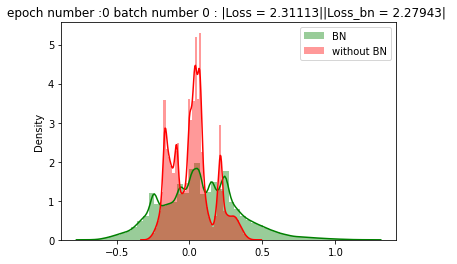

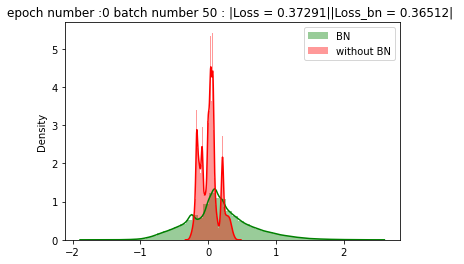

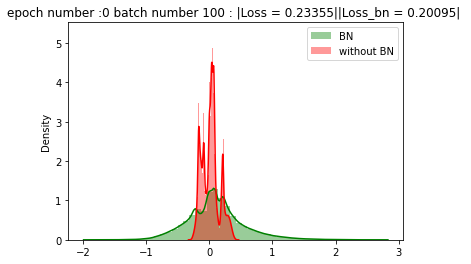

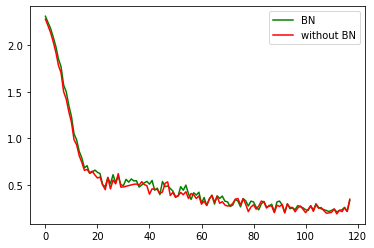

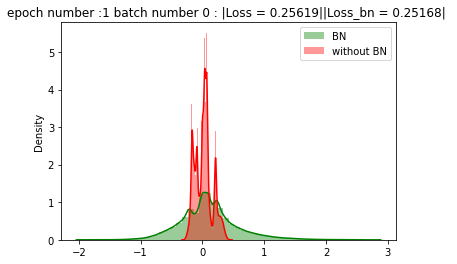

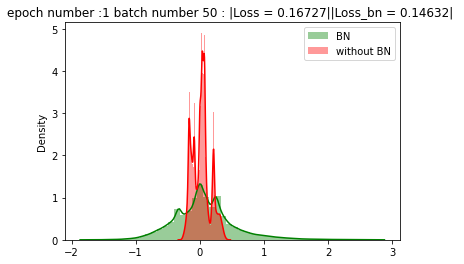

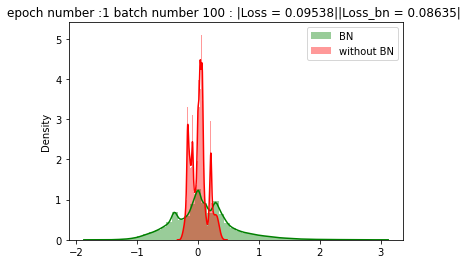

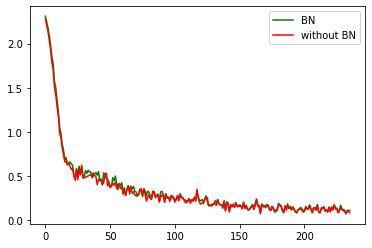

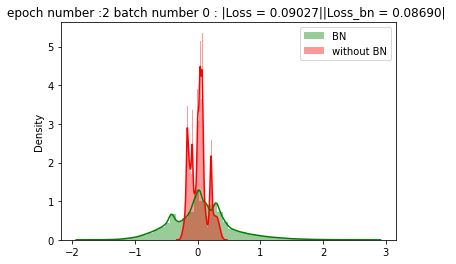

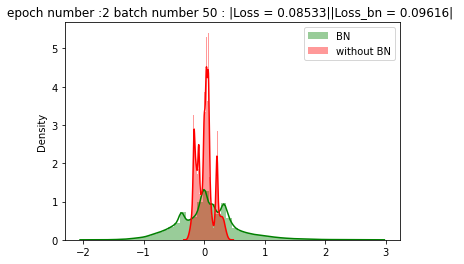

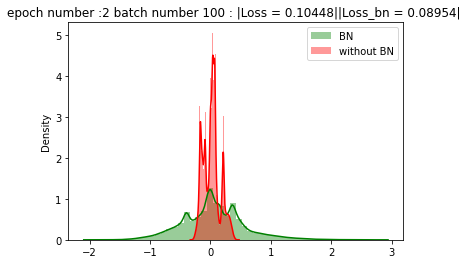

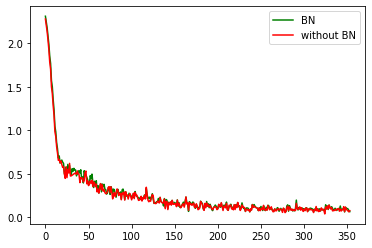

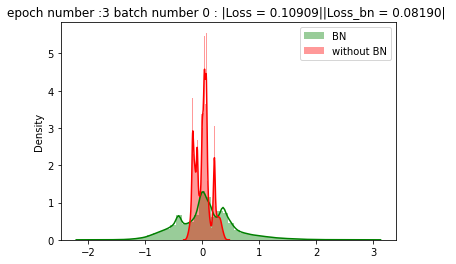

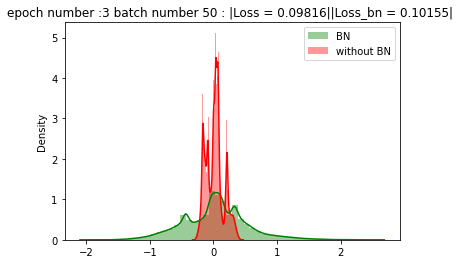

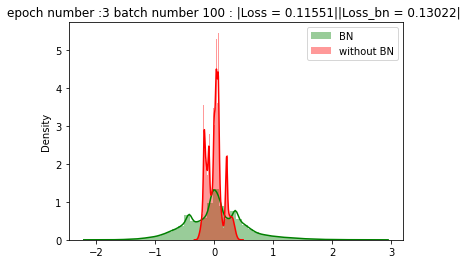

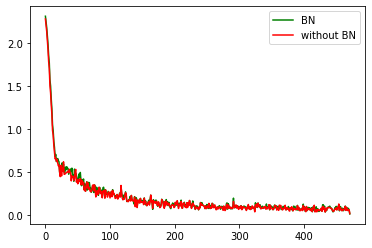

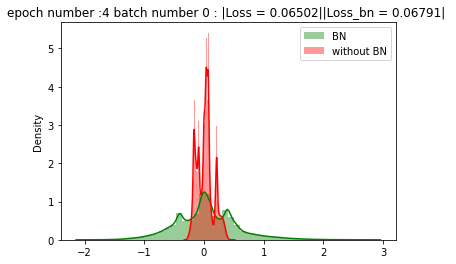

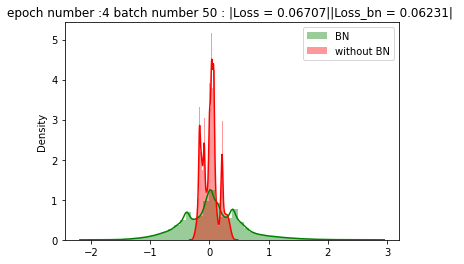

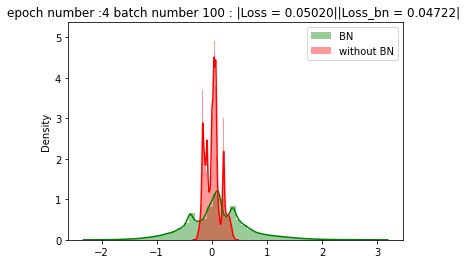

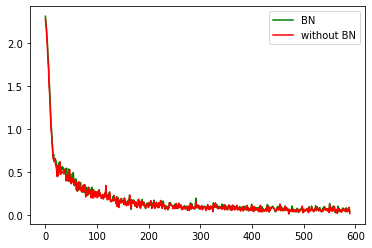

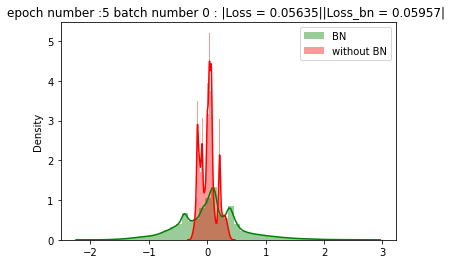

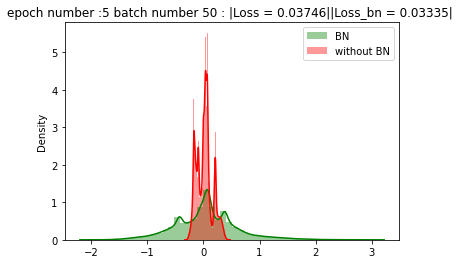

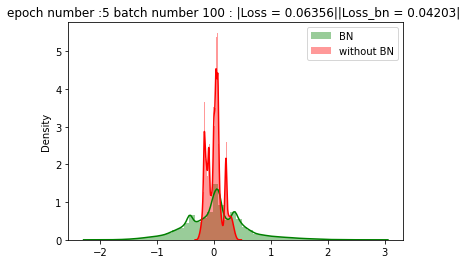

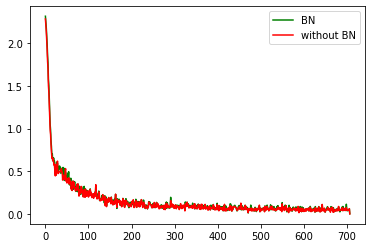

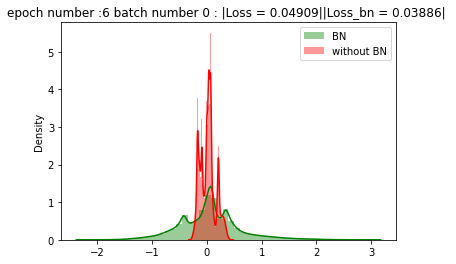

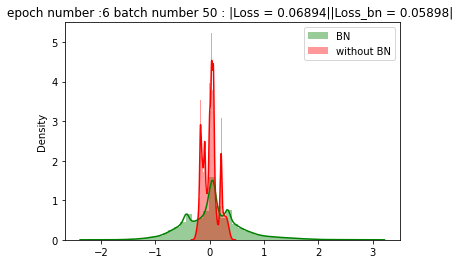

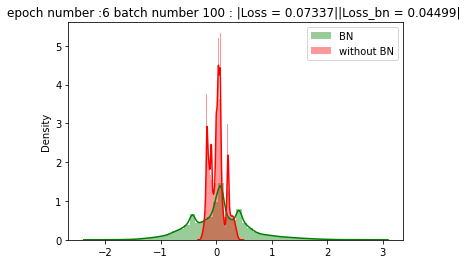

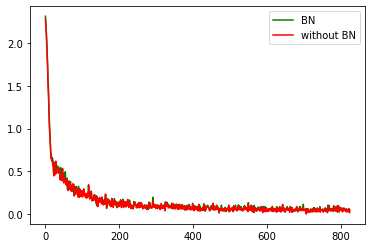

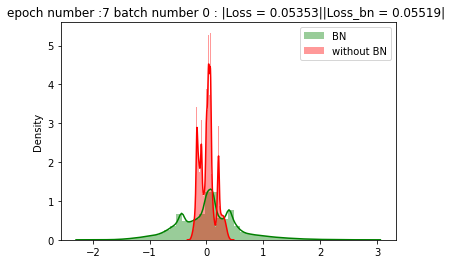

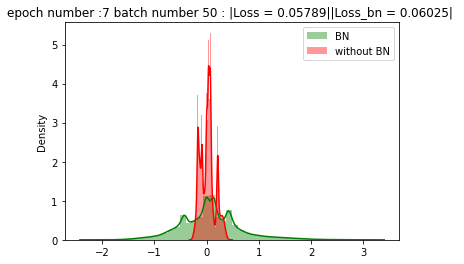

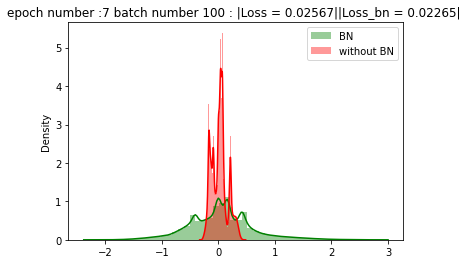

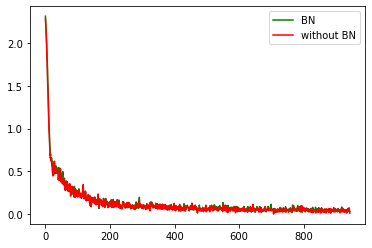

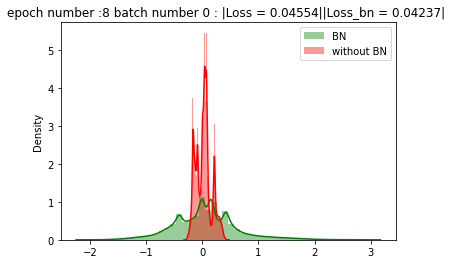

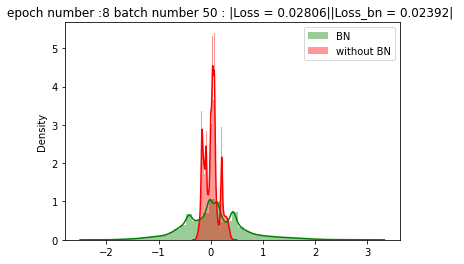

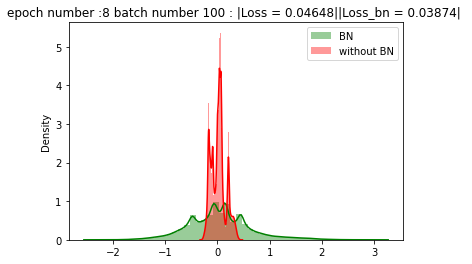

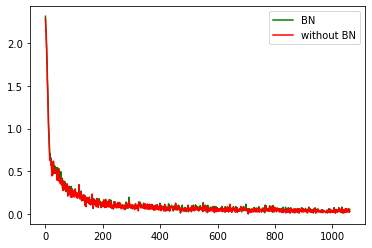

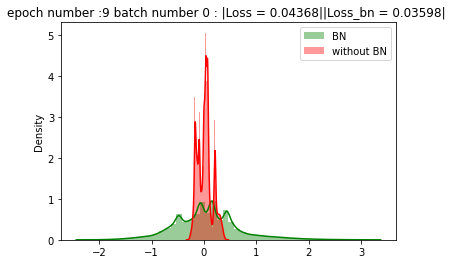

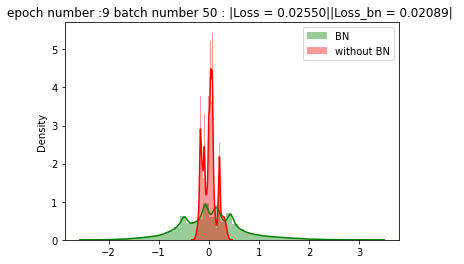

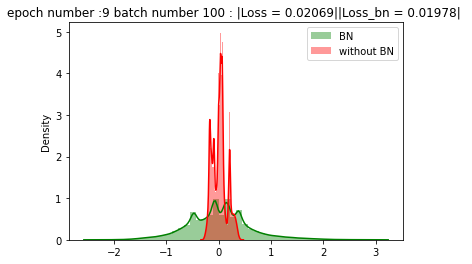

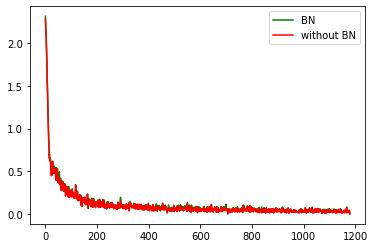

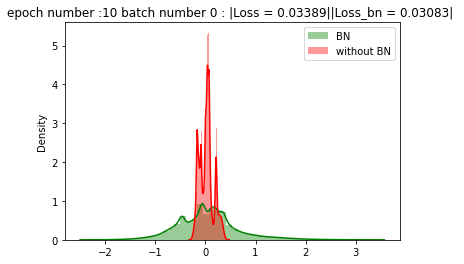

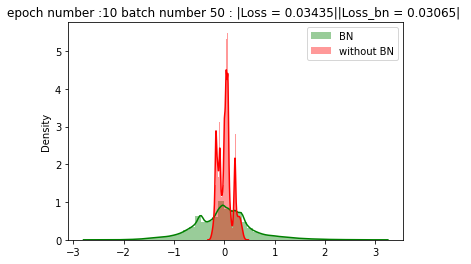

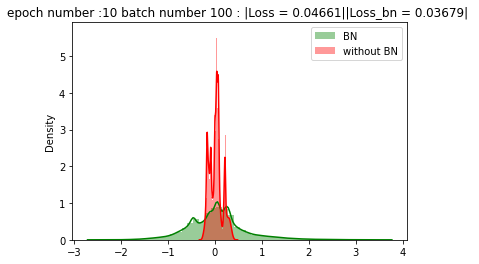

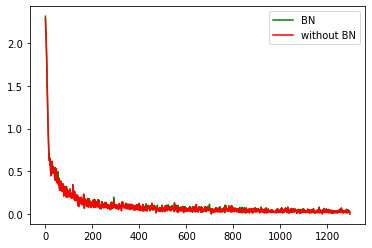

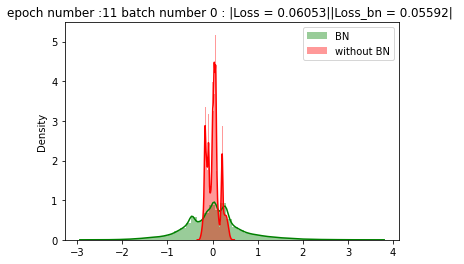

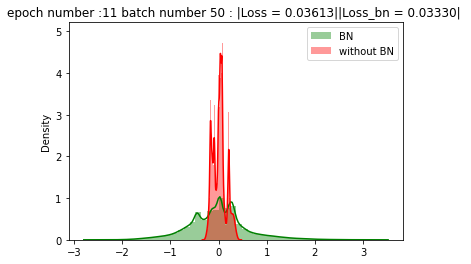

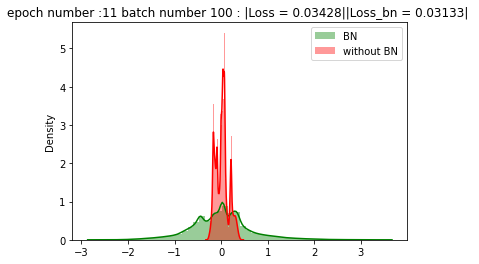

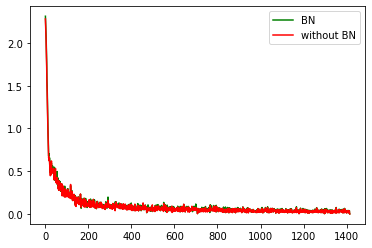

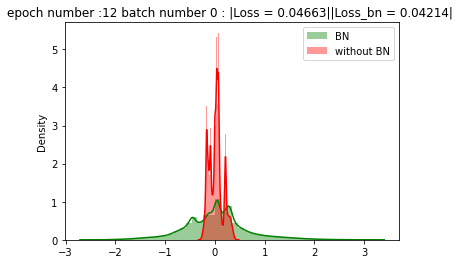

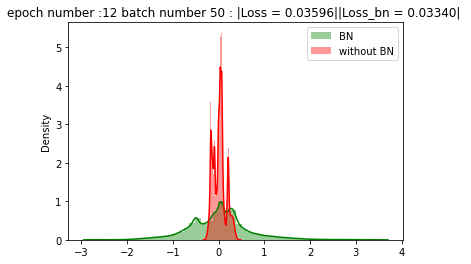

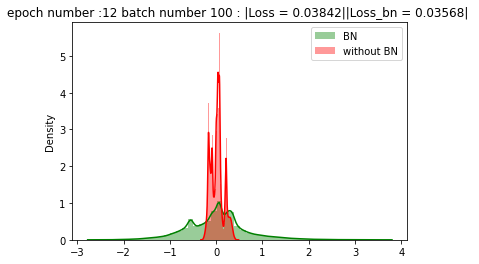

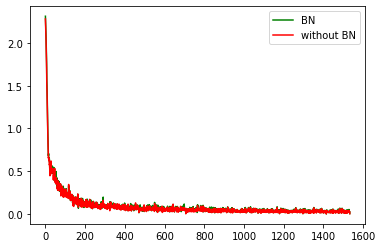

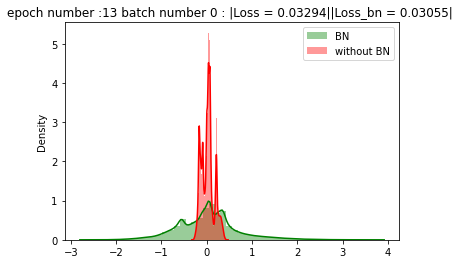

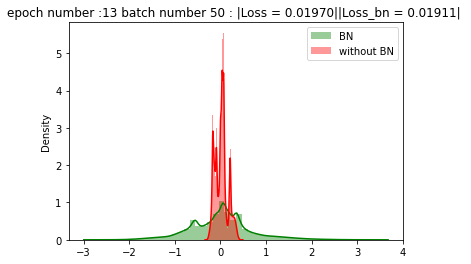

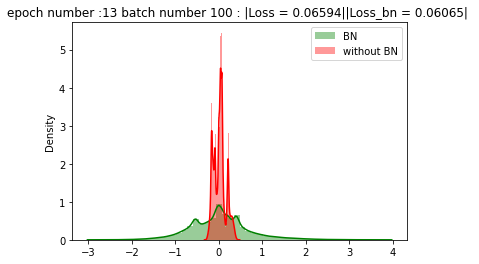

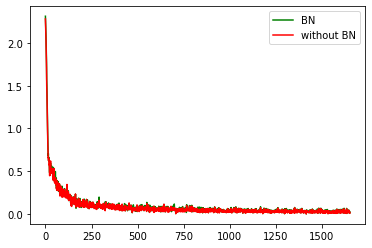

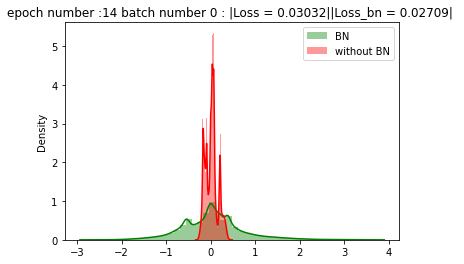

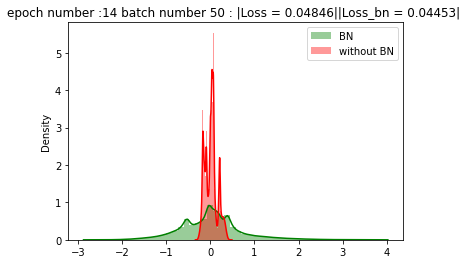

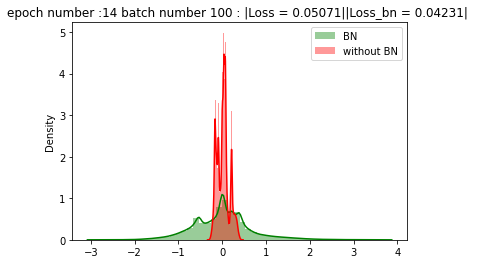

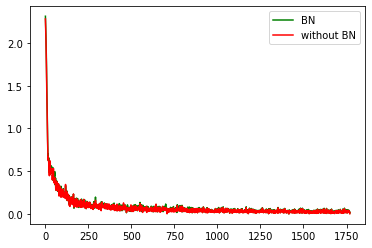

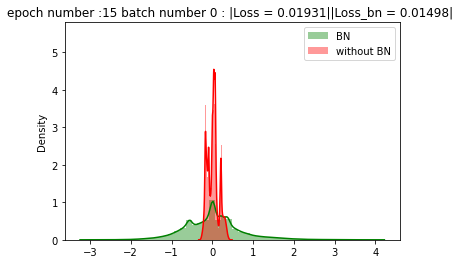

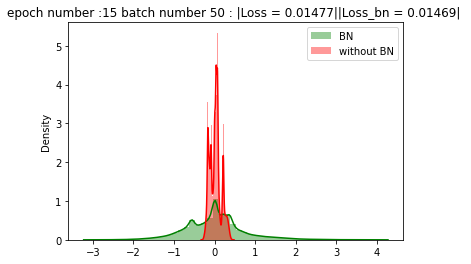

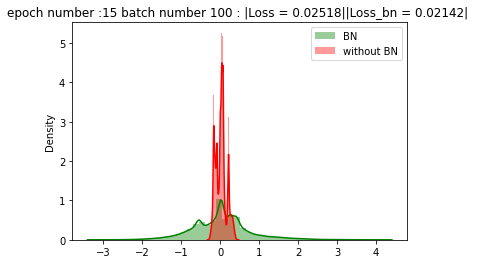

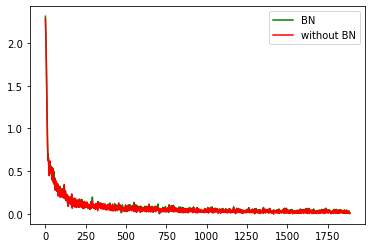

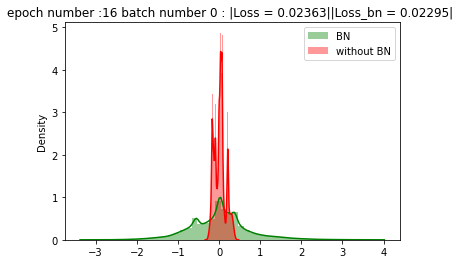

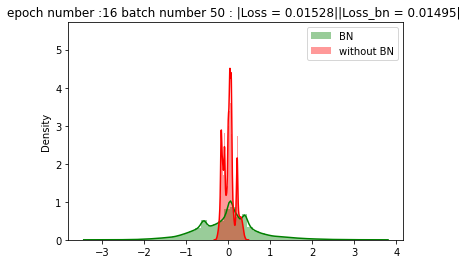

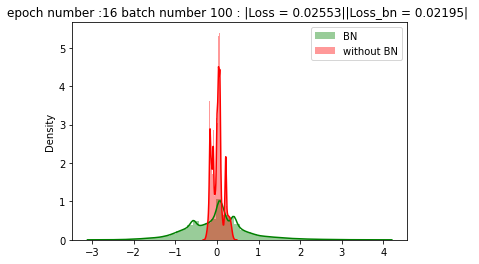

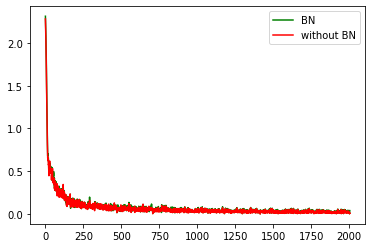

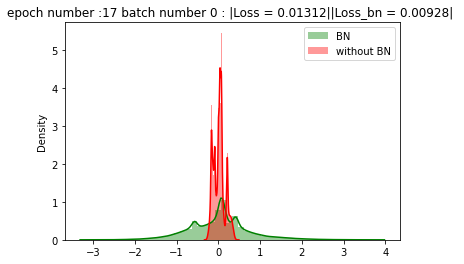

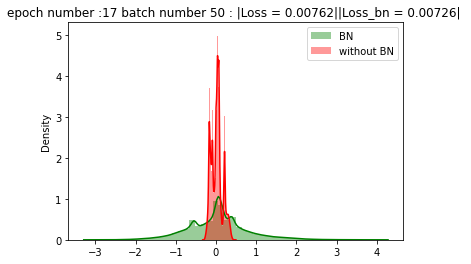

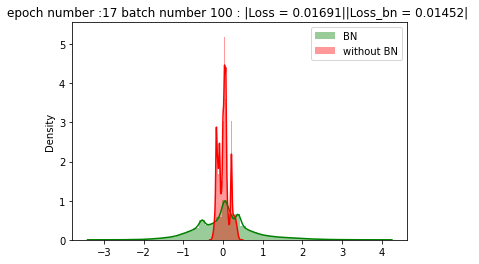

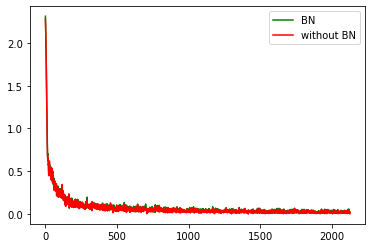

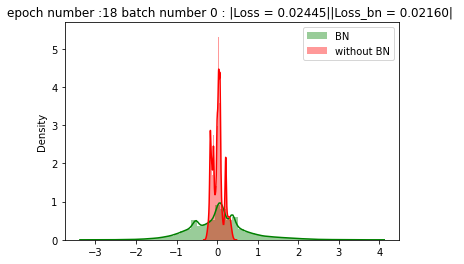

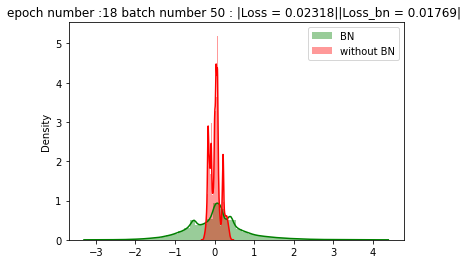

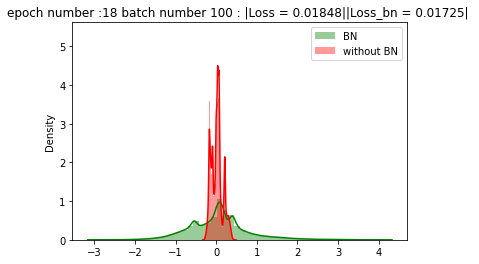

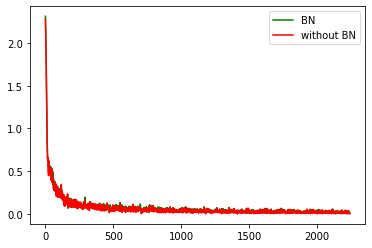

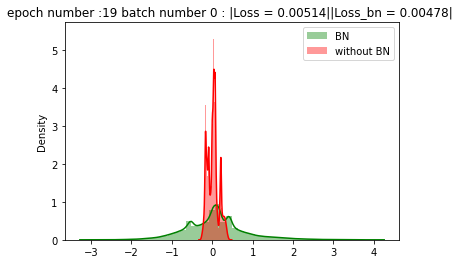

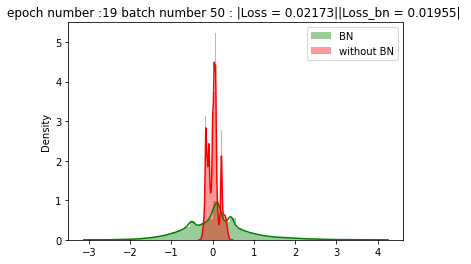

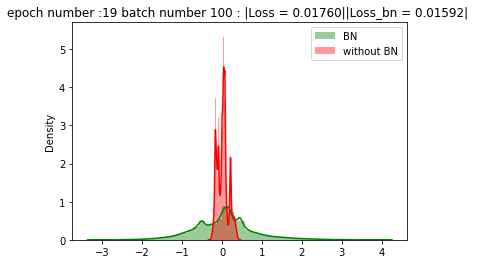

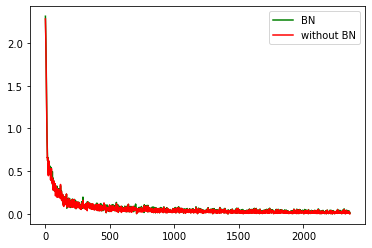

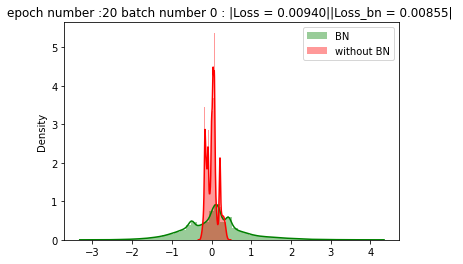

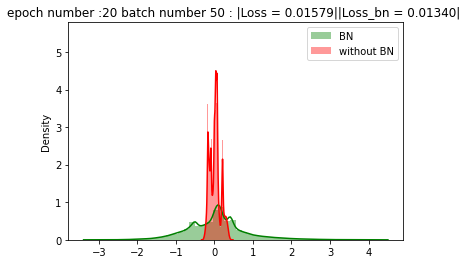

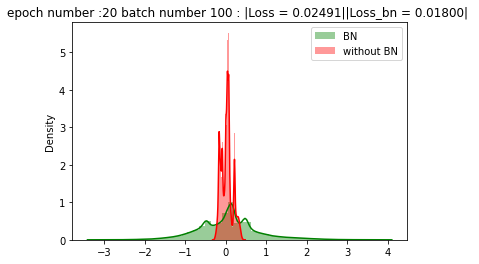

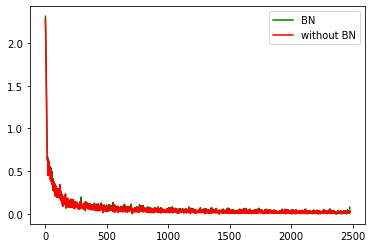

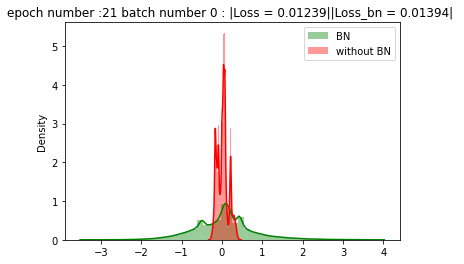

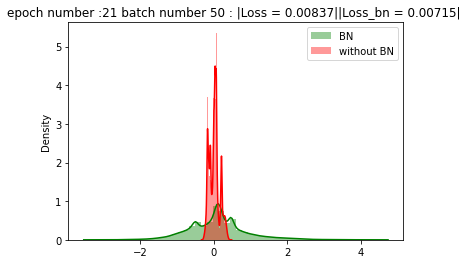

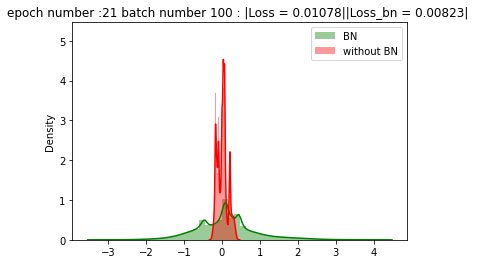

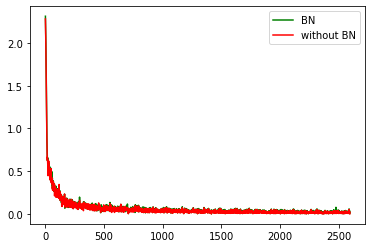

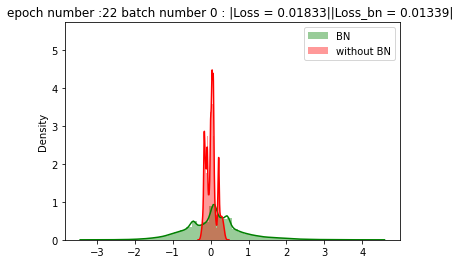

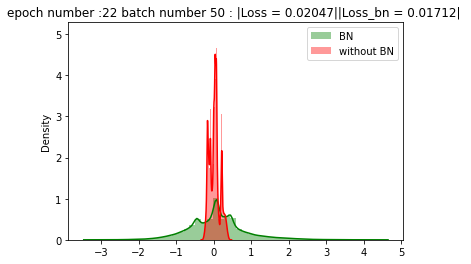

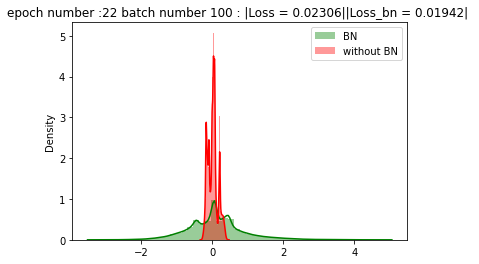

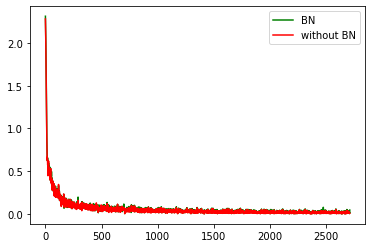

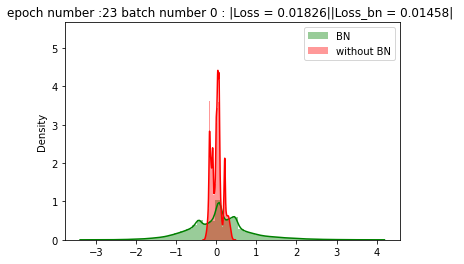

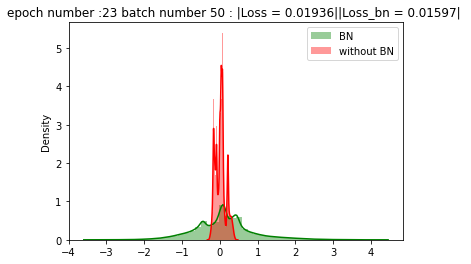

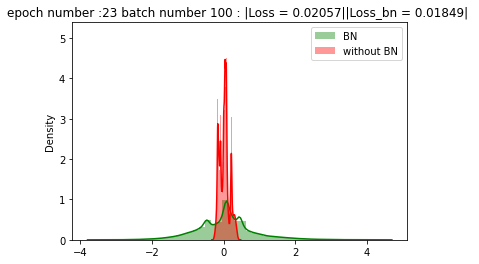

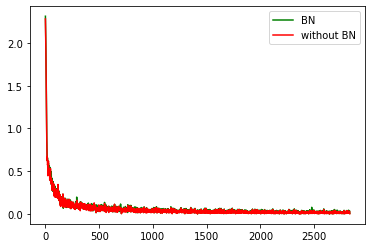

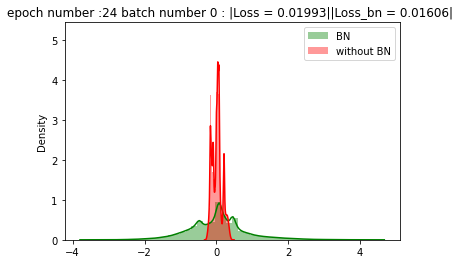

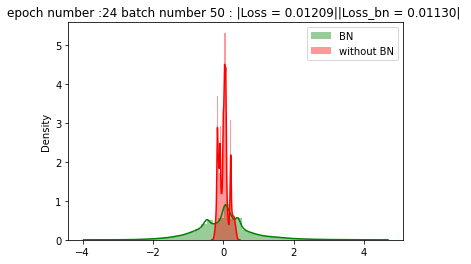

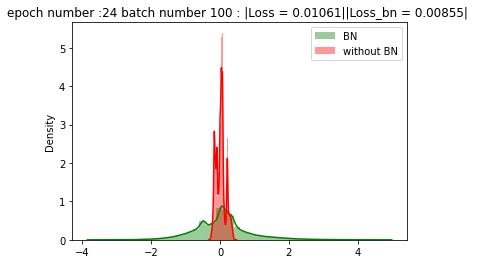

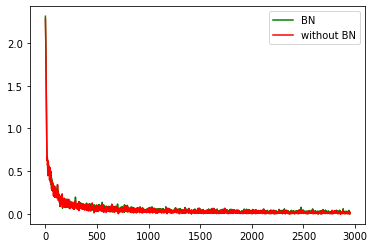

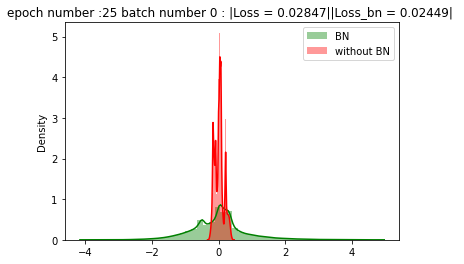

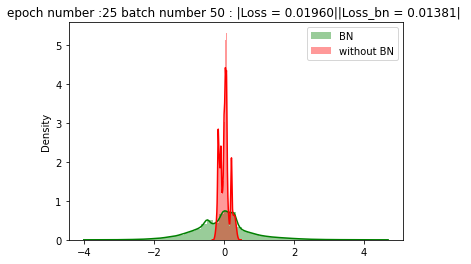

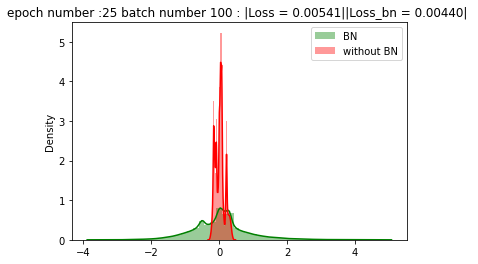

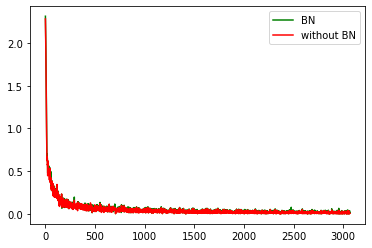

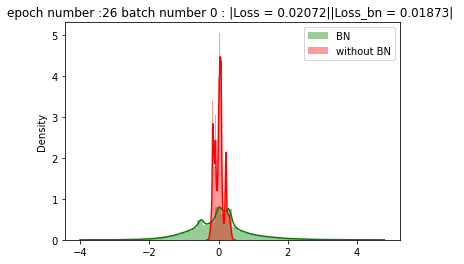

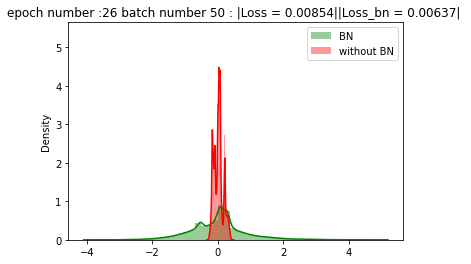

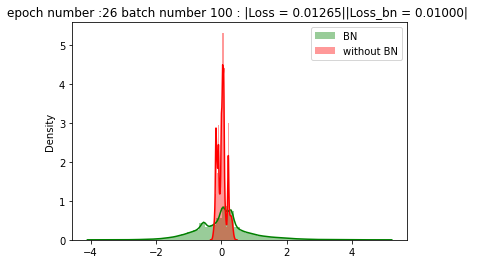

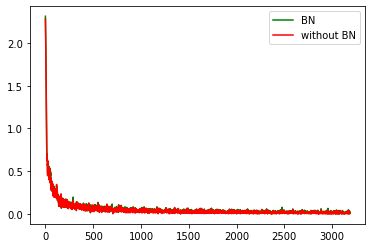

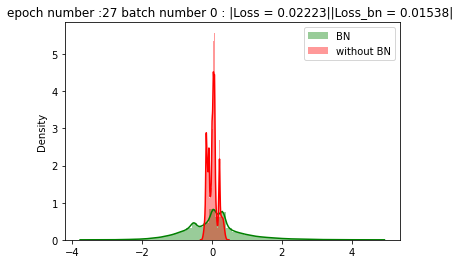

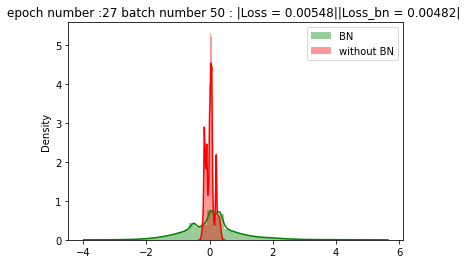

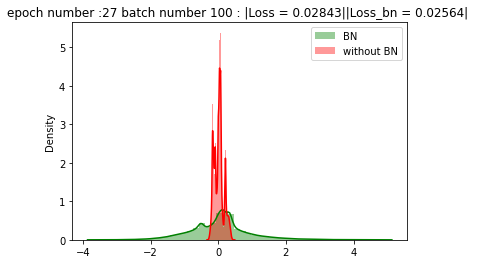

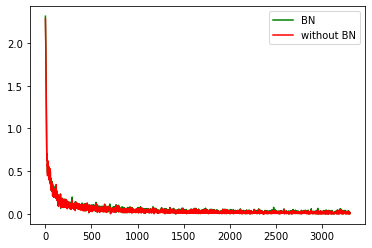

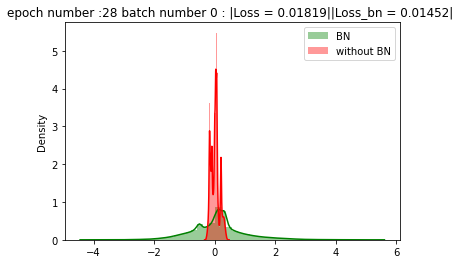

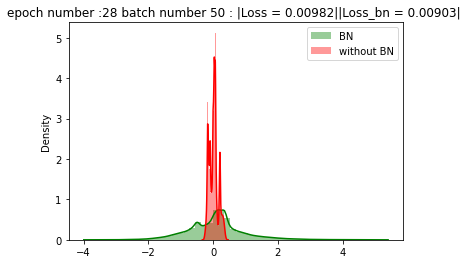

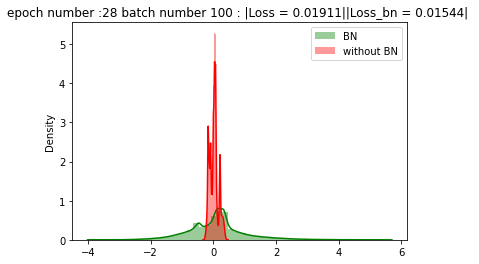

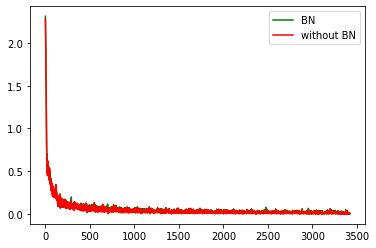

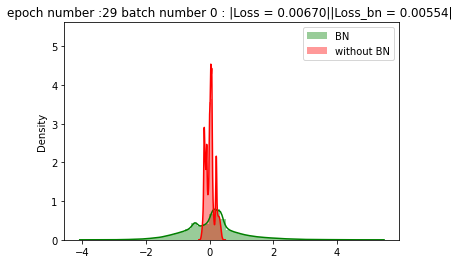

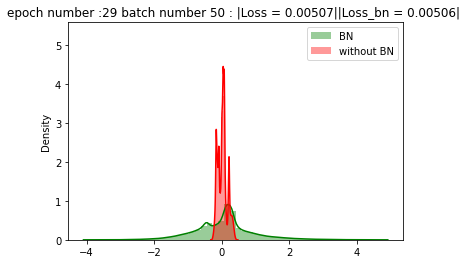

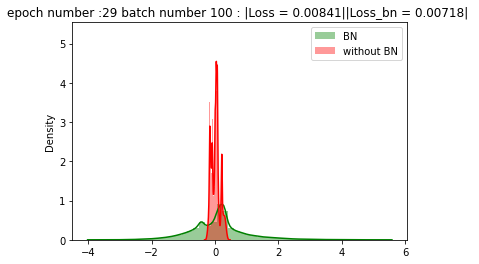

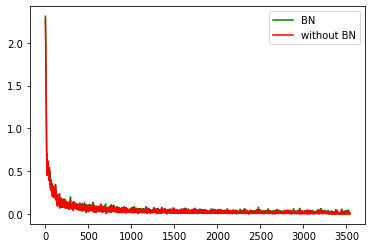

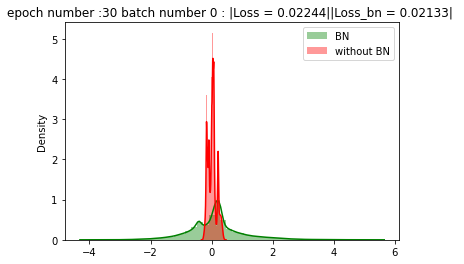

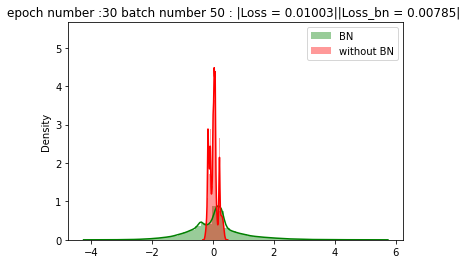

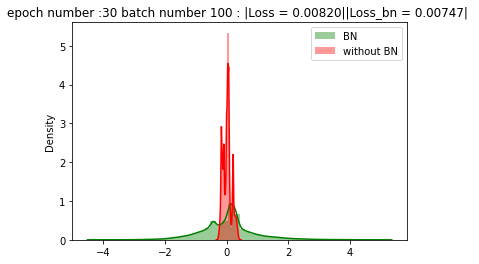

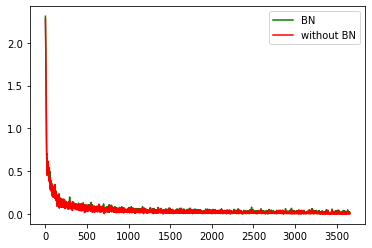

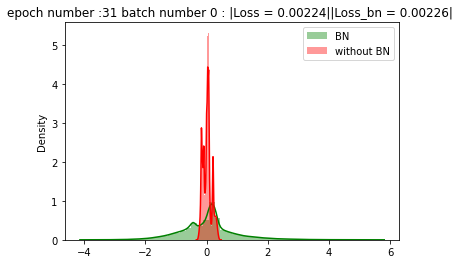

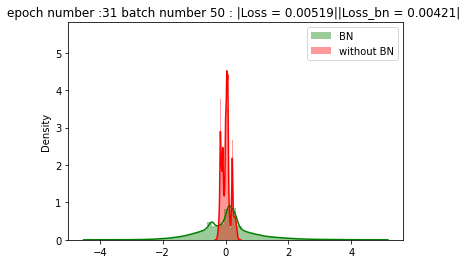

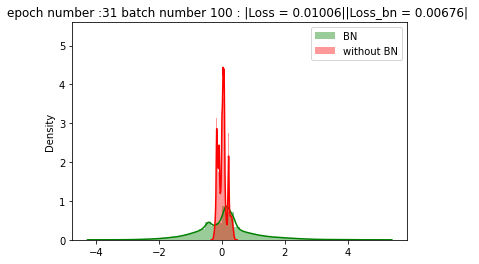

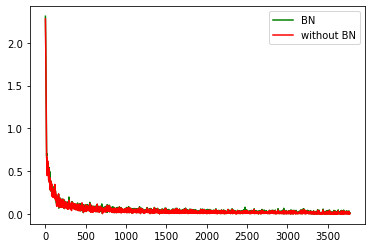

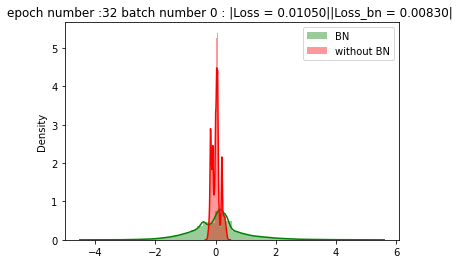

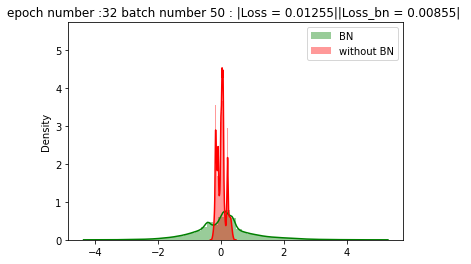

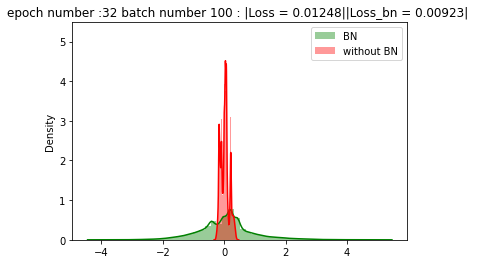

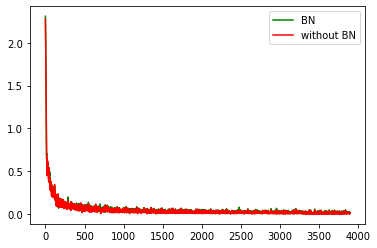

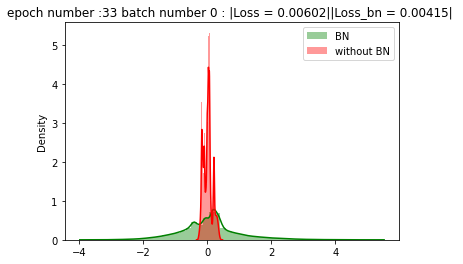

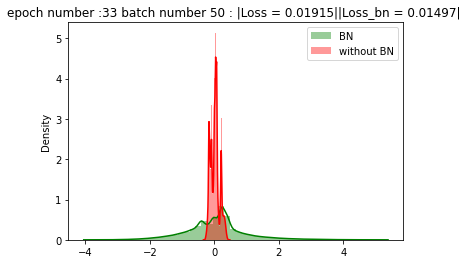

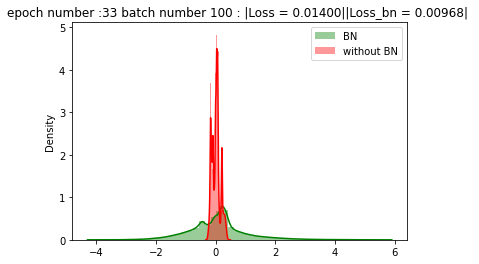

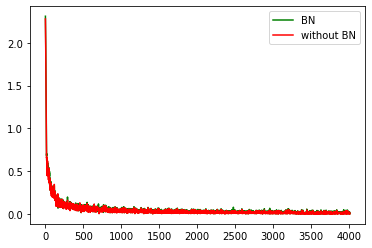

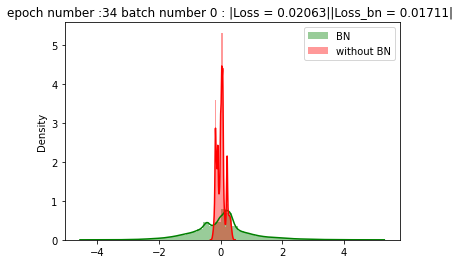

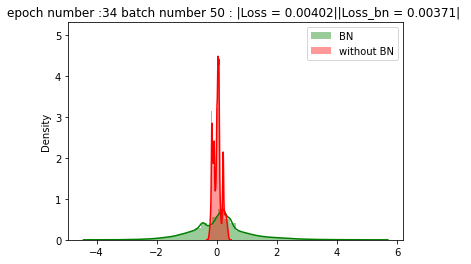

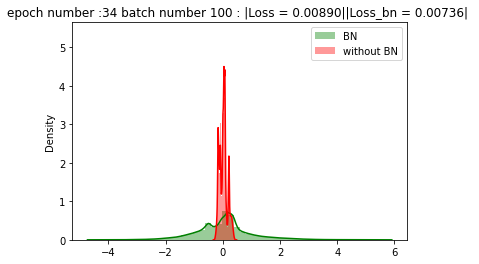

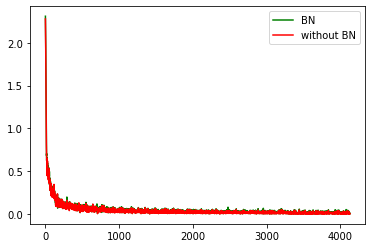

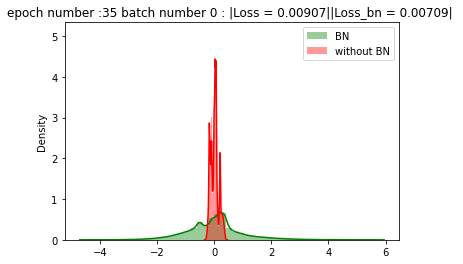

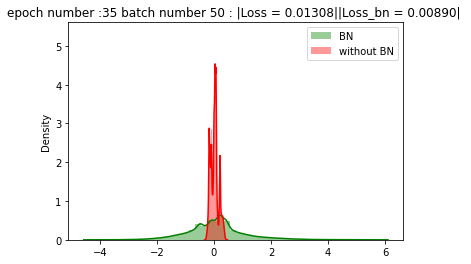

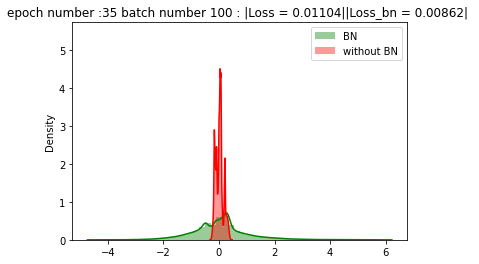

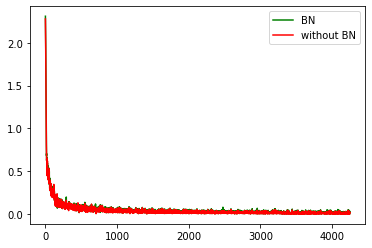

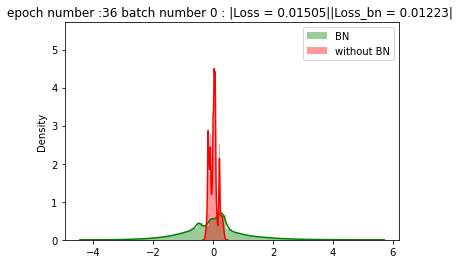

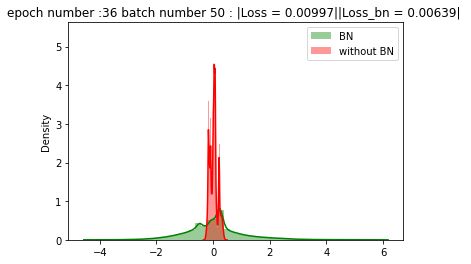

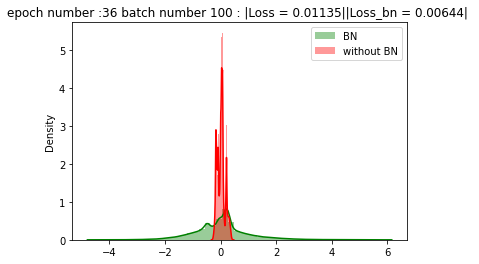

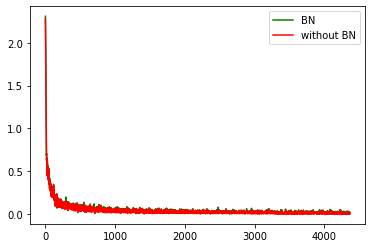

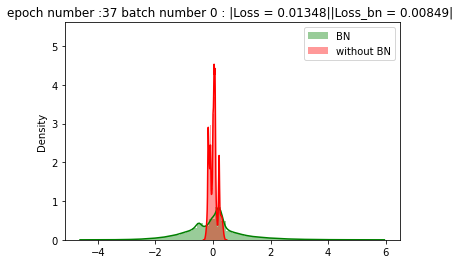

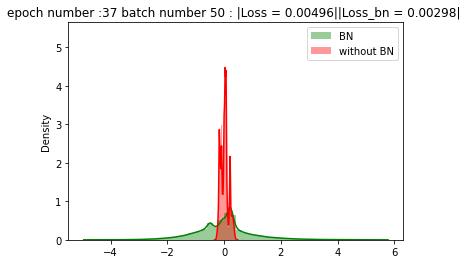

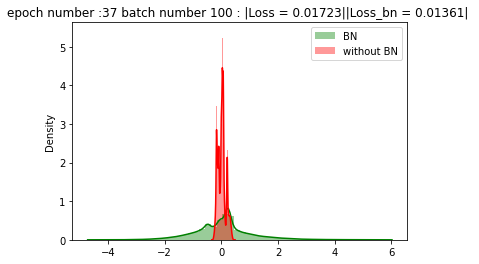

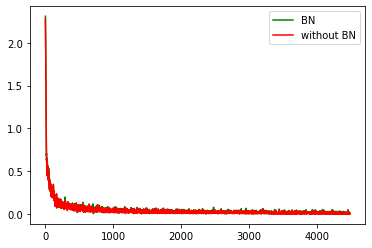

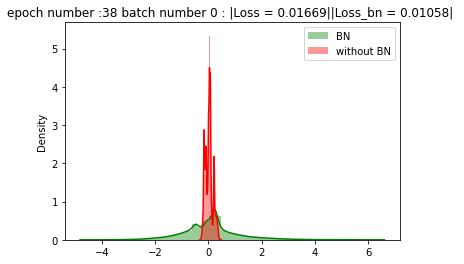

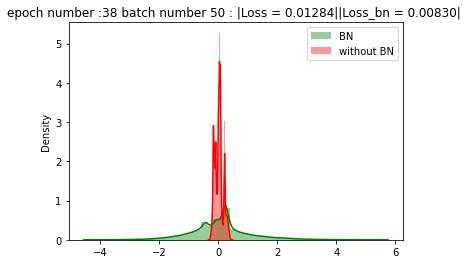

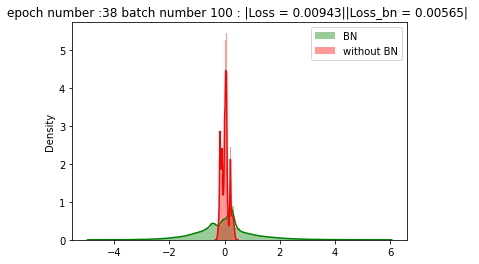

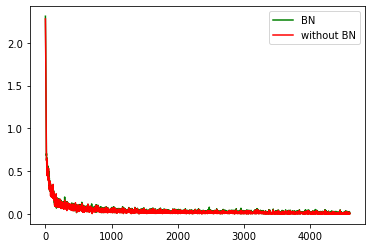

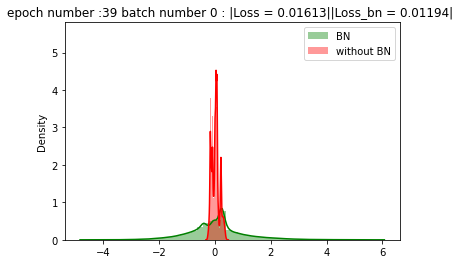

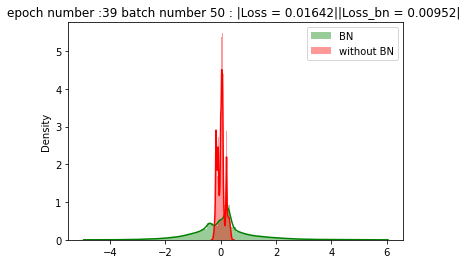

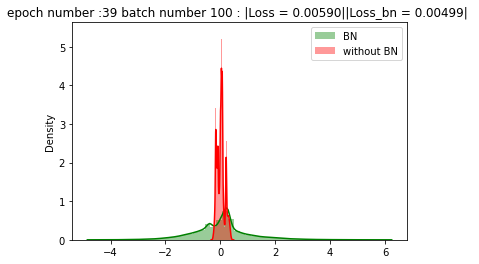

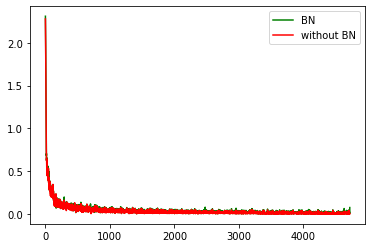

In [91]:
loss_a=[]
loss_just_a=[]
max_epochs=40
for epoch in range(40):
  for i,data in enumerate(trainloader,0):
    input,label=data
    #CNN with BatchNorm
    Optim.zero_grad()
    output=MyCNNModel(input)
    Loss=losS(output,label)
    Loss.backward()
    Optim.step()
    #CNN without BatchNorm
    Optim_just.zero_grad()
    output_just=MyCNNModel(input)
    Loss_just=losS_just(output_just,label)
    Loss_just.backward()
    Optim_just.step()


    loss_a.append(Loss)
    loss_just_a.append(Loss_just)
    if i%50==0:
      #CNN with BatchNorm
      MyCNNModel.eval()
      x=MyCNNModel.features1[0](input)
      x=MyCNNModel.features1[1](x)
      x=MyCNNModel.features1[2](x)
      x=MyCNNModel.features1[3](x)
      x=MyCNNModel.features1[4](x)
      x=x.detach().numpy().ravel()
      sns.distplot(x,kde=True,color='g',label='BN')



      #CNN without BatchNorm
      justCNN.eval()
      y=justCNN.features1[0](input)
      y=justCNN.features1[1](y)
      y=justCNN.features1[2](y)
      y=justCNN.features1[3](y)
      y=y.detach().numpy().ravel()
      sns.distplot(y,kde=True,color='r',label='without BN')
      plt.title('epoch number :%d batch number %d : |Loss = %.5f||Loss_bn = %.5f| '%(epoch,i,Loss_just.item(),Loss.item()))
      plt.legend()
      plt.show()
      plt.pause(.5)
      MyCNNModel.train()
  plt.plot(loss_a,'g',label='BN')
  plt.plot(loss_just_a,'r',label='without BN')
  plt.legend()
  plt.show()


